In [1]:
from pipeline.gui import tabs

In [ ]:
tabs.start_gui()

: 

In [11]:
im_new='RFP_s01_f0008_z0001.tif'
im_old='mask_red_f0008_z0001.tif'
channel_seg='red'
chan_seg='RFP'
f=7

In [8]:
from nd2reader import ND2Reader

ImportError: cannot import name 'ND2Reade' from 'nd2reader' (/opt/conda/envs/cp_dock/lib/python3.8/site-packages/nd2reader/__init__.py)

In [2]:
path = '/home/ImageData/c077_Test_35p_0.1ms.nd2'

In [9]:
img_obj = ND2Reader(path)

NameError: name 'rpath' is not defined

In [ ]:
img_obj.get_frame_2D()

In [5]:
from nd2 import ND2File

In [6]:
nd_obj = ND2File(path)

In [14]:
nd_obj.read_frame(1)

array([[[101, 109, 116, ..., 108, 109, 112],
        [103, 108, 104, ..., 130, 122, 109],
        [115, 111, 118, ..., 115, 107,  98],
        ...,
        [108, 124, 114, ..., 116, 117, 105],
        [115, 117, 115, ...,  97, 102, 113],
        [119, 118, 118, ..., 118, 127, 109]],

       [[116, 111, 119, ..., 105, 109, 119],
        [105, 110, 110, ..., 120, 115,  99],
        [109, 110, 120, ..., 106, 114, 105],
        ...,
        [122, 124, 117, ..., 103, 128, 110],
        [114, 119, 113, ..., 105, 126, 113],
        [130, 154, 128, ..., 130, 127, 126]]], dtype=uint16)

In [9]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

In [2]:
csv_path = '/home/ImageData/fibro_calcium_masterdf_analysis.csv'

In [3]:
file = pd.read_csv(csv_path)

In [17]:
file['normalized'] = file['GFP']/file['RFP']
file['distance'] = (file['wound_dOW']+file['wound_dEW'])/2

In [18]:
file.keys()

Index(['cell', 'frames', 'time', 'mask_chan', 'tag', 'exp', 'RFP',
       'z-score_RFP', 'z-outlier_RFP', 'q1_RFP', 'q3_RFP', 'iqr_RFP',
       'q1*iqr_RFP', 'q3*iqr_RFP', 'iqr-outlier_RFP', 'GFP', 'z-score_GFP',
       'z-outlier_GFP', 'q1_GFP', 'q3_GFP', 'iqr_GFP', 'q1*iqr_GFP',
       'q3*iqr_GFP', 'iqr-outlier_GFP', 'RFP/GFP', 'GFP/RFP',
       'condition_label', 'mask_ID', 'y', 'x', 'wound', 'wound_dOW',
       'wound_dEW', 'wound_dOE', 'wound_dist', 'wound_tot_length', 'wound_Dp',
       'wound_Dw', 'wound_speed', 'wound_tot_speed', 'normalized', 'distance'],
      dtype='object')

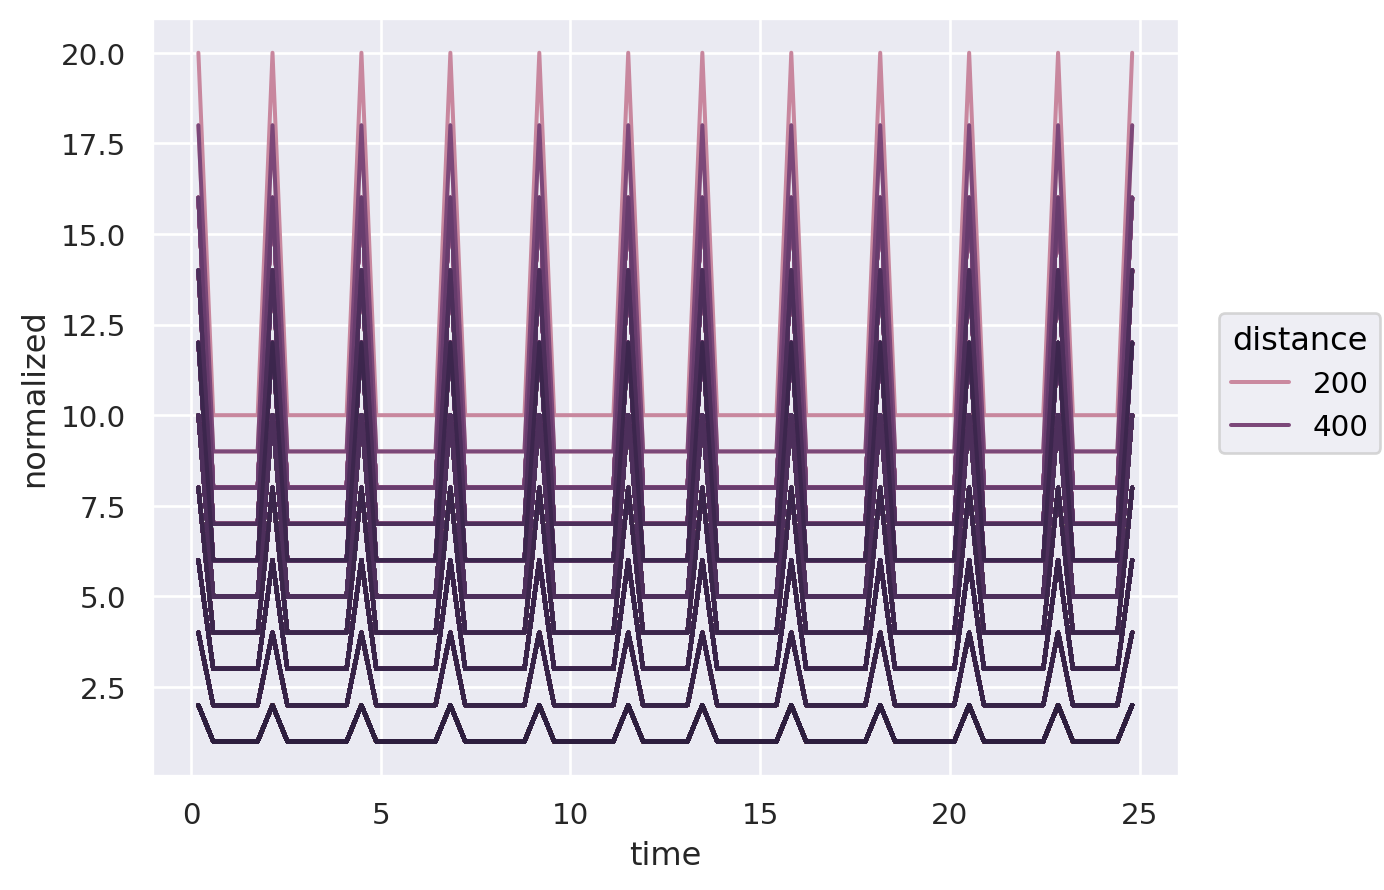

In [26]:
df2 = file.query('tag=="1166-GCaMP"')
fig = (so.Plot(data=df2, y='normalized', x='time', color='distance') 
.add(so.Line(),so.Hist())
# .add(so.Range(), so.Est(errorbar="se"),so.Dodge())
# .theme(sns.axes_style("ticks" ,{"axes.edgecolor":"black", "axes.labelcolor":"black"}))
#.label(x='$F_0/F_1$', y='number of cells')
)
fig